In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 불균형처리
- target 데이터가 소수인 경우, 모델은 target데이터의 중요도를 낮게 판단함.
- => 원하는 모델을 만들 수 없음

In [1]:

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


## 언더샘플링
- 다수 레이블을 가진 데이터 -> 샘플링
- 단점 : 데이터 수가 줄어 학습 성능이 떨어질 수 있음

In [4]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [19]:
undersample = RandomUnderSampler(sampling_strategy=0.5)  # 비율에 맞게 조정
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


## 오버 샘플링
- 소수의 레이블을 지닌 데이터셋을 증가시킴
#### RandomOverSampler
- 단순 복제하여 비율을 맞춤
- 분포는 변하지 않지만 수가 늘어나 같은 비율로 가중치를 받을 수 있음
- 단점 : 오버피팅의 위험성이 있

In [6]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5) 
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [7]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


#### SMOTE
- 소수 레이블을 지닌 데이터셋에 대해 k개의 최근접 이웃(knn)을 찾고
- 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법

In [22]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


In [23]:
x[:, 2]

array([-0.41355453, -2.7210268 ,  2.73891464, ...,  1.88430795,
        0.40455401, -2.69560363])

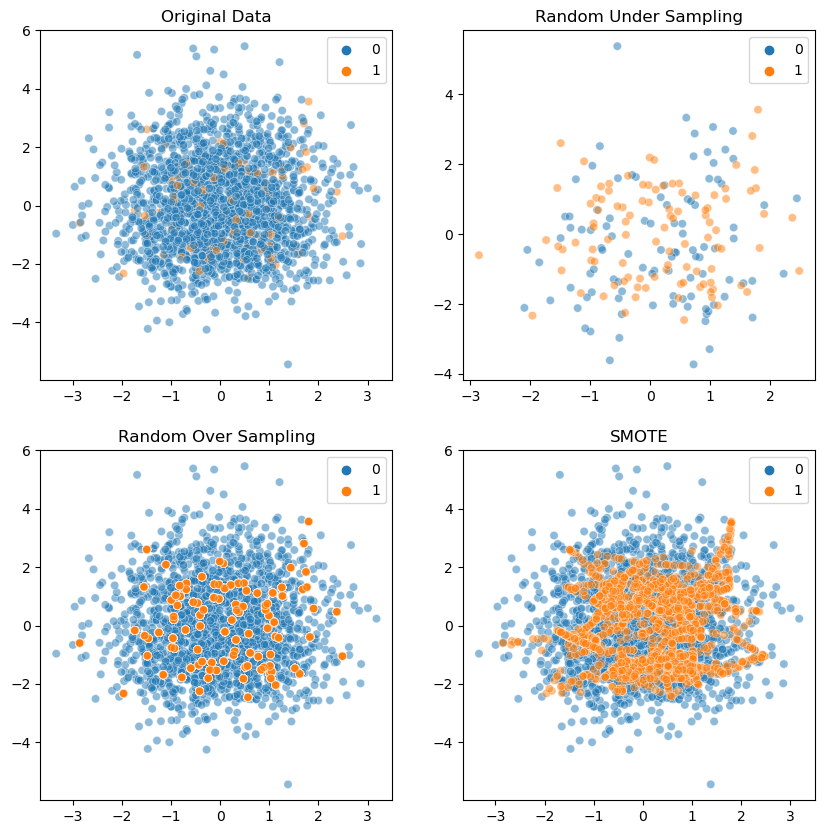

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x = x[:, 1], y = x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()